In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [20]:
sa = pd.read_csv("C:\\Users\\kodum\\Downloads\\iris.csv")
sa

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
sa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
sa.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [32]:
sa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


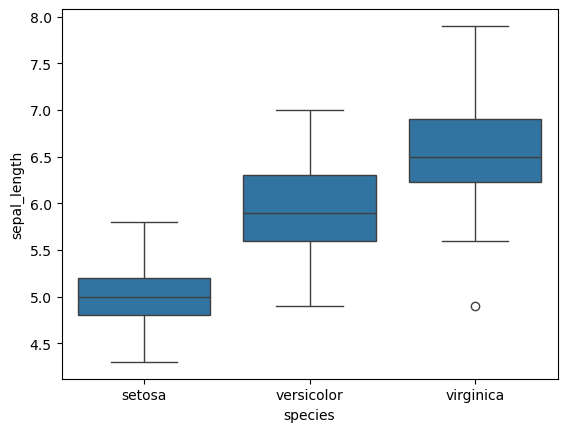

In [42]:
sns.boxplot(y='sepal_length', x='species', data=sa)
plt.show()

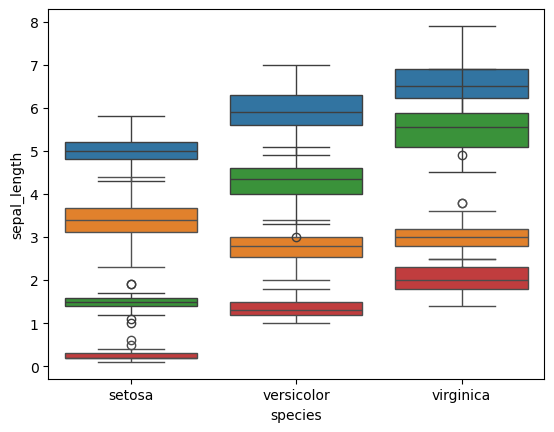

In [52]:
for i in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    sns.boxplot(x='species', y=i, data=sa)
plt.show()

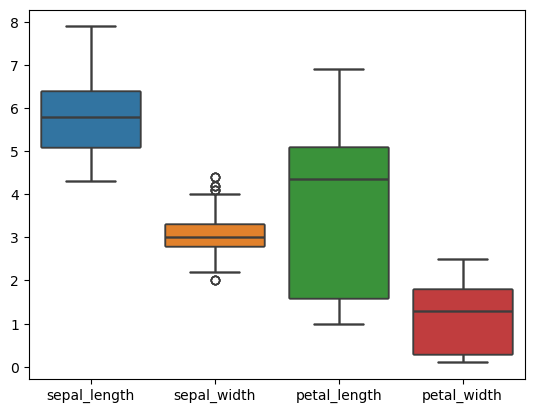

In [48]:
for i in sa.columns:
    sns.boxplot(data=sa)
plt.show()

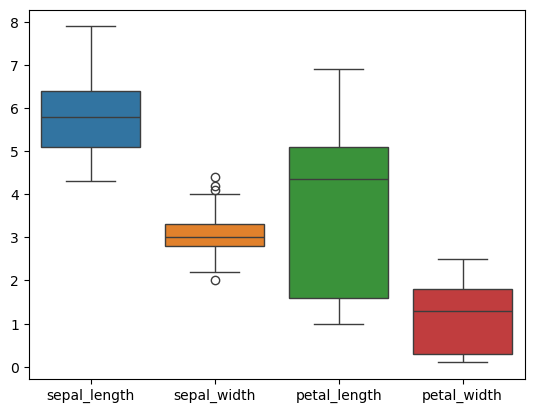

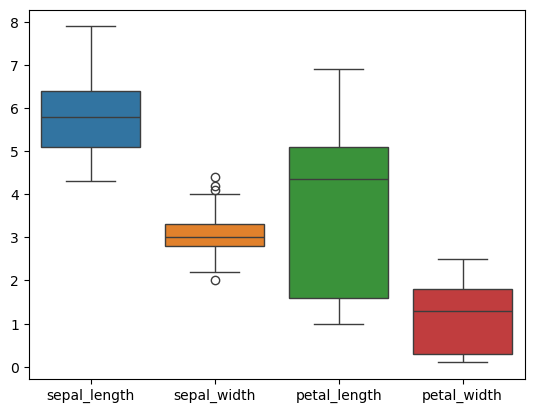

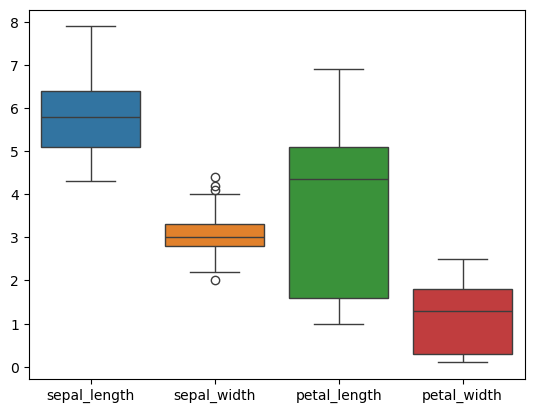

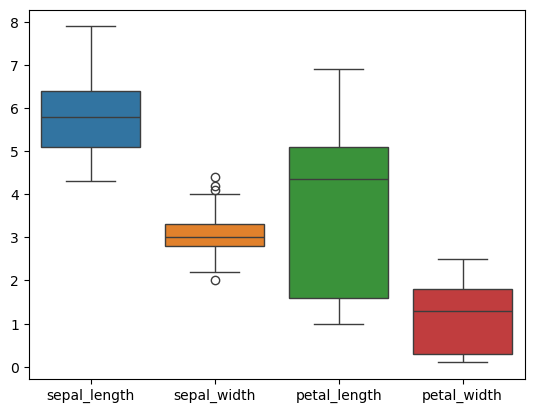

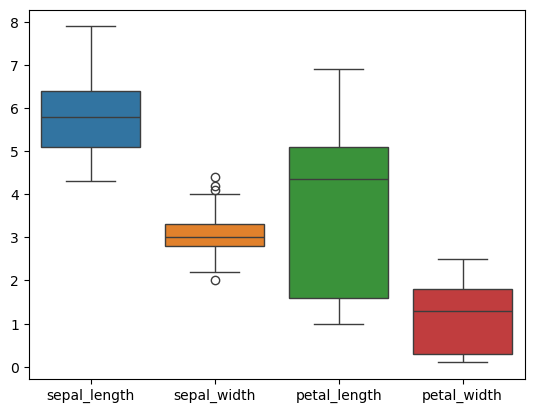

In [50]:
for i in sa.columns:
    sns.boxplot(data=sa)
    plt.show()

In [56]:
#standardisation
x = sa.iloc[:, 0:3].values
sc = MinMaxScaler()
x = sc.fit_transform(x)
x

array([[0.22222222, 0.625     , 0.06779661],
       [0.16666667, 0.41666667, 0.06779661],
       [0.11111111, 0.5       , 0.05084746],
       [0.08333333, 0.45833333, 0.08474576],
       [0.19444444, 0.66666667, 0.06779661],
       [0.30555556, 0.79166667, 0.11864407],
       [0.08333333, 0.58333333, 0.06779661],
       [0.19444444, 0.58333333, 0.08474576],
       [0.02777778, 0.375     , 0.06779661],
       [0.16666667, 0.45833333, 0.08474576],
       [0.30555556, 0.70833333, 0.08474576],
       [0.13888889, 0.58333333, 0.10169492],
       [0.13888889, 0.41666667, 0.06779661],
       [0.        , 0.41666667, 0.01694915],
       [0.41666667, 0.83333333, 0.03389831],
       [0.38888889, 1.        , 0.08474576],
       [0.30555556, 0.79166667, 0.05084746],
       [0.22222222, 0.625     , 0.06779661],
       [0.38888889, 0.75      , 0.11864407],
       [0.22222222, 0.75      , 0.08474576],
       [0.30555556, 0.58333333, 0.11864407],
       [0.22222222, 0.70833333, 0.08474576],
       [0.

In [64]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

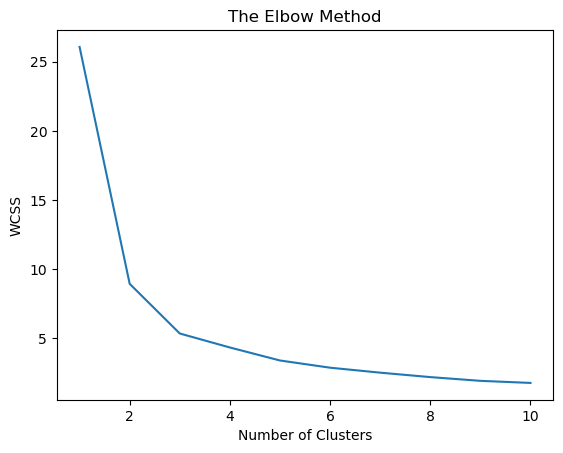

In [66]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit(x)
y_kmeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [72]:
kmeans.cluster_centers_

array([[0.12626263, 0.37689394, 0.12634823],
       [0.24392361, 0.6796875 , 0.0842161 ],
       [0.55960648, 0.37326389, 0.67355226]])

In [106]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

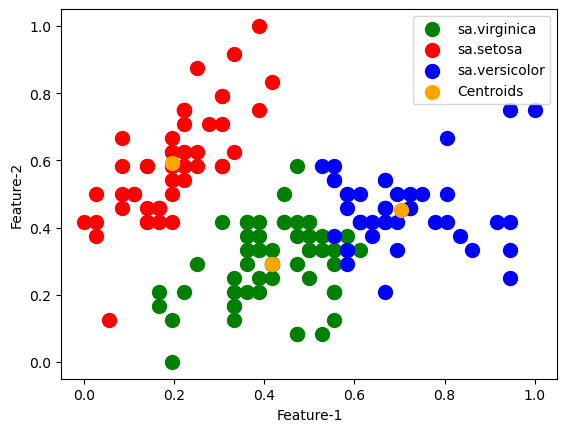

In [108]:
#visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'sa.virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'sa.setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'sa.versicolor')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'Centroids')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.legend()
plt.show()